In [714]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [648]:
data = pd.read_csv("Mall_Customers.csv")

In [649]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [650]:
data.Gender

0        Male
1        Male
2      Female
3      Female
4      Female
        ...  
195    Female
196    Female
197      Male
198      Male
199      Male
Name: Gender, Length: 200, dtype: object

In [651]:
le = preprocessing.LabelEncoder()
g = le.fit_transform(data.iloc[:,1])
print(g)

[1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 1 1 1]


In [652]:
g.shape

(200,)

In [653]:
gender = pd.DataFrame(data = g, index = range(200), columns = ["Gender"])

In [654]:
gender

,Gender
0,1
1,1
2,0
3,0
4,0
...,...
195,0
196,0
197,1
198,1


In [655]:
data["Gender"] = gender

In [656]:
data.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
8,9,1,64,19,3
9,10,0,30,19,72


In [657]:
data.describe()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.440000,38.850000,60.560000,50.200000
std,57.879185,0.497633,13.969007,26.264721,25.823522
min,1.000000,0.000000,18.000000,15.000000,1.000000
25%,50.750000,0.000000,28.750000,41.500000,34.750000
50%,100.500000,0.000000,36.000000,61.500000,50.000000
75%,150.250000,1.000000,49.000000,78.000000,73.000000
max,200.000000,1.000000,70.000000,137.000000,99.000000


In [658]:
data.corr()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,0.057400,-0.026763,0.977548,0.013835
Gender,0.057400,1.000000,0.060867,0.056410,-0.058109
Age,-0.026763,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.058109,-0.327227,0.009903,1.000000


In [659]:
data[["Gender", "Age"]].head(20)

,Gender,Age
0,1,19
1,1,21
2,0,20
3,0,23
4,0,31
5,0,22
6,0,35
7,0,23
8,1,64
9,0,30


In [660]:
data[data["Gender"]>0].head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
8,9,1,64,19,3
10,11,1,67,19,14
14,15,1,37,20,13
15,16,1,22,20,79
17,18,1,20,21,66
18,19,1,52,23,29
20,21,1,35,24,35
21,22,1,25,24,73


In [661]:
data[data["Gender"]<1].head(30)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
5,6,0,22,17,76
6,7,0,35,18,6
7,8,0,23,18,94
9,10,0,30,19,72
11,12,0,35,19,99
12,13,0,58,20,15
13,14,0,24,20,77


In [662]:
data["Age"].max()

70

In [663]:
data["Age"].min()

18

In [664]:
data["Annual Income (k$)"].max()

137

In [665]:
data["Annual Income (k$)"].min()

15

In [666]:
data[data["Spending Score (1-100)"]>98]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
11,12,0,35,19,99


In [667]:
data[data["Spending Score (1-100)"]<2]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
156,157,1,37,78,1
158,159,1,34,78,1


In [668]:
data[data["Annual Income (k$)"]>136]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,199,1,32,137,18
199,200,1,30,137,83


In [669]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [670]:
data.count()

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [671]:
data.mean()

CustomerID                100.50
Gender                      0.44
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [672]:
data.max()

CustomerID                200
Gender                      1
Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99
dtype: int64

In [673]:
age = data.groupby("Age")

In [674]:
age.count()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,4,4,4,4
19,8,8,8,8
20,5,5,5,5
21,5,5,5,5
22,3,3,3,3
23,6,6,6,6
24,4,4,4,4
25,3,3,3,3
26,2,2,2,2


In [675]:
age.mean()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100)
Age,,,,
18,76.750000,0.750000,51.250000,60.000000
19,97.000000,0.750000,57.000000,39.750000
20,59.200000,0.600000,41.600000,40.200000
21,52.200000,0.200000,38.800000,66.800000
22,36.666667,0.333333,31.333333,70.000000
23,57.833333,0.000000,41.500000,63.333333
24,49.500000,0.500000,39.250000,71.500000
25,100.000000,0.666667,57.666667,39.666667
26,90.000000,1.000000,58.000000,54.500000


In [676]:
age.describe()

CustomerID                                                               \
         count        mean         std    min     25%    50%     75%    max   
Age                                                                           
18         4.0   76.750000   34.826953   34.0   58.00   79.0   97.75  115.0   
19         8.0   97.000000   51.018204    1.0   67.25  113.0  121.75  163.0   
20         5.0   59.200000   56.202313    3.0   18.00   40.0  100.00  135.0   
21         5.0   52.200000   42.310755    2.0   32.00   36.0   85.00  106.0   
22         3.0   36.666667   44.736264    6.0   11.00   16.0   52.00   88.0   
23         6.0   57.833333   50.948667    4.0   13.50   54.5   95.50  125.0   
24         4.0   49.500000   34.112559   14.0   35.00   44.0   58.50   96.0   
25         3.0  100.000000   67.815927   22.0   77.50  133.0  139.00  145.0   
26         2.0   90.000000   19.798990   76.0   83.00   90.0   97.00  104.0   
27         6.0  110.000000   51.865210   48.0   68.75  109.5  147.25  178.0   
28         4.0  162.250000   21.546461  143.0  145.25  159.0  176.00  188.0   
29         5.0  111.400000   70.041416   26.0   49.00  136.0  162.00  184.0   
30         7.0  132.571429   75.997494   10.0   98.00  160.0  181.00  200.0   
31         8.0   75.000000   58.032011    5.0   39.00   51.5  128.00  164.0   
32        11.0  152.545455   41.826699   70.0  140.00  148.0  187.00  199.0   
33         3.0  137.666667   75.235187   52.0  110.00  168.0  180.50  193.0   
34         5.0  147.600000   36.929663   89.0  149.00  150.0  159.00  191.0   
35         9.0   69.000000   78.798794    7.0   17.00   21.0  140.00  196.0   
36         6.0  151.833333   55.897823   39.0  166.75  171.0  173.75  190.0   
37         3.0  117.666667   89.718077   15.0   86.00  157.0  169.00  181.0   
38         6.0  132.500000   38.187694   82.0  115.25  126.0  148.00  194.0   
39         3.0  136.000000   14.422205  124.0  128.00  132.0  142.00  152.0   
40         6.0  103.833333   48.635035   29.0   82.00  108.5  126.75  171.0   
41         2.0  187.000000    2.828427  185.0  186.00  187.0  188.00  189.0   
42         2.0  102.000000   91.923882   37.0   69.50  102.0  134.50  167.0   
43         3.0  115.000000   43.266615   67.0   97.00  127.0  139.00  151.0   
44         2.0  145.000000   11.313708  137.0  141.00  145.0  149.00  153.0   
45         3.0  100.333333   87.368949   27.0   52.00   77.0  137.00  197.0   
46         3.0   96.666667   80.748581   23.0   53.50   84.0  133.50  183.0   
47         6.0  117.666667   52.663713   56.0   78.25  114.0  149.00  195.0   
48         5.0   93.600000   37.078296   43.0   86.00   93.0   99.00  147.0   
49         7.0   76.571429   33.069912   35.0   48.00   80.0  103.50  118.0   
50         5.0   95.400000   48.613784   47.0   55.00   90.0  120.00  165.0   
51         2.0   88.000000   43.840620   57.0   72.50   88.0  103.50  119.0   
52         2.0   97.000000  110.308658   19.0   58.00   97.0  136.00  175.0   
53         2.0   46.500000   19.091883   33.0   39.75   46.5   53.25   60.0   
54         4.0   96.000000   69.498201   25.0   54.25   86.0  127.75  187.0   
55         1.0   87.000000         NaN   87.0   87.00   87.0   87.00   87.0   
56         1.0  161.000000         NaN  161.0  161.00  161.0  161.00  161.0   
57         2.0  111.000000   42.426407   81.0   96.00  111.0  126.00  141.0   
58         2.0   95.000000  115.965512   13.0   54.00   95.0  136.00  177.0   
59         4.0  109.250000   56.216101   54.0   69.75  102.0  141.50  179.0   
60         3.0   59.333333   24.542480   31.0   52.00   73.0   73.50   74.0   
63         2.0   91.000000   36.769553   65.0   78.00   91.0  104.00  117.0   
64         1.0    9.000000         NaN    9.0    9.00    9.0    9.00    9.0   
65         2.0   76.000000   49.497475   41.0   58.50   76.0   93.50  111.0   
66         2.0  108.500000    2.121320  107.0  107.75  108.5  109.25  110.0   
67         4.0   65.000000   39.530579   11.0   50.00 

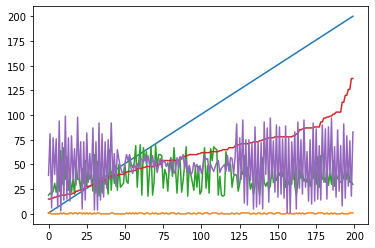

In [677]:
plt.plot(data)

In [678]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


Text(0, 0.5, 'Spending Score')

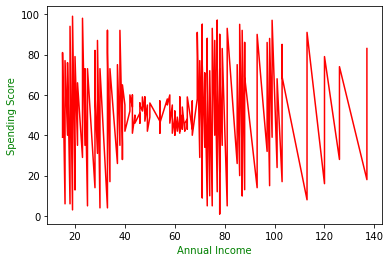

In [679]:
plt.plot(data["Annual Income (k$)"], data["Spending Score (1-100)"], "r")
plt.xlabel("Annual Income", c="g")
plt.ylabel("Spending Score", c="g")

Text(0, 0.5, 'Annual Income')

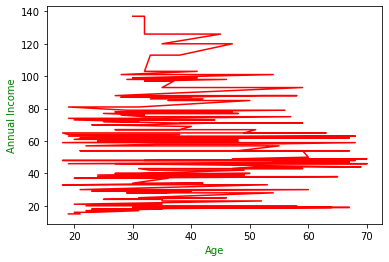

In [680]:
plt.plot(data["Age"], data["Annual Income (k$)"], "r")
plt.xlabel("Age", c="g")
plt.ylabel("Annual Income", c="g")

Text(0, 0.5, 'Spending Score')

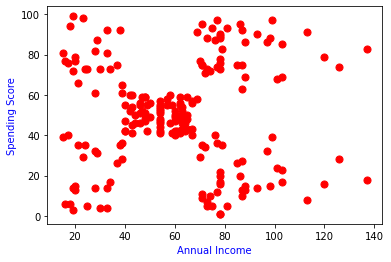

In [681]:
plt.scatter('Annual Income (k$)', 'Spending Score (1-100)', c="r", s = 50, data=data)
plt.xlabel("Annual Income", c="b")
plt.ylabel("Spending Score", c="b")

Text(0, 0.5, 'Annual Income')

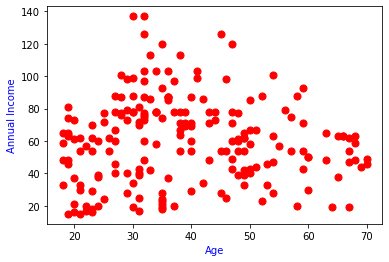

In [682]:
plt.scatter('Age', 'Annual Income (k$)', c="r", s = 50, data=data)
plt.xlabel("Age", c="b")
plt.ylabel("Annual Income", c="b")

In [683]:
gender1 = data.groupby("Gender").size()

In [684]:
gender1

Gender
0    112
1     88
dtype: int64

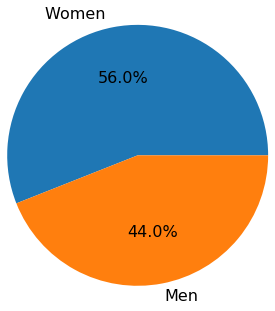

In [685]:
plt.pie(gender1.values, labels = ["Women ", "Men"] , autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

(array([112.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  88.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

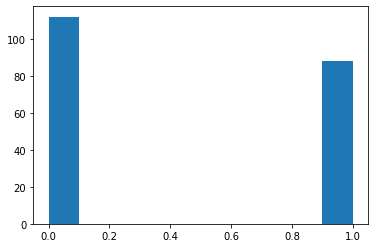

In [686]:
plt.hist(data.Gender)

(array([31., 19., 34., 29., 16., 26., 15., 10.,  6., 14.]),
 array([18. , 23.2, 28.4, 33.6, 38.8, 44. , 49.2, 54.4, 59.6, 64.8, 70. ]),
 <BarContainer object of 10 artists>)

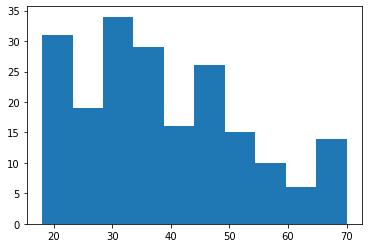

In [687]:
plt.hist(data.Age)

In [688]:
age1 = data.groupby("Age").size()

In [689]:
age1

Age
18     4
19     8
20     5
21     5
22     3
23     6
24     4
25     3
26     2
27     6
28     4
29     5
30     7
31     8
32    11
33     3
34     5
35     9
36     6
37     3
38     6
39     3
40     6
41     2
42     2
43     3
44     2
45     3
46     3
47     6
48     5
49     7
50     5
51     2
52     2
53     2
54     4
55     1
56     1
57     2
58     2
59     4
60     3
63     2
64     1
65     2
66     2
67     4
68     3
69     1
70     2
dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x212eefec1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x212eefec8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x212eefd6e50>],
 'medians': [<matplotlib.lines.Line2D at 0x212eefecf70>],
 'fliers': [<matplotlib.lines.Line2D at 0x212eefed310>],
 'means': []}

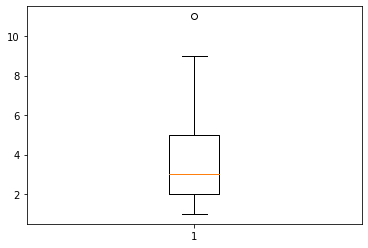

In [690]:
plt.boxplot(age1)

{'whiskers': [<matplotlib.lines.Line2D at 0x212f0184880>,
 'caps': [<matplotlib.lines.Line2D at 0x212f0184f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x212f0184520>],
 'medians': [<matplotlib.lines.Line2D at 0x212f0180640>],
 'fliers': [<matplotlib.lines.Line2D at 0x212f01809a0>],
 'means': []}

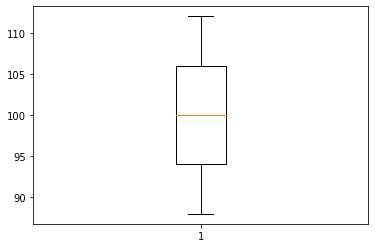

In [691]:
plt.boxplot(gender1)

In [692]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [693]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [694]:
X = data.iloc[:,1:].values

In [695]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [696]:

kmeans = KMeans(n_clusters = 3, init = "k-means++")
kmeans.fit(X)
kmeans.cluster_centers_

array([[ 0.52631579, 40.39473684, 87.        , 18.63157895],
       [ 0.40650407, 40.32520325, 44.15447154, 49.82926829],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [697]:
sonuclar = []
for i in range (1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state=0)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)


C:\Users\OZAN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


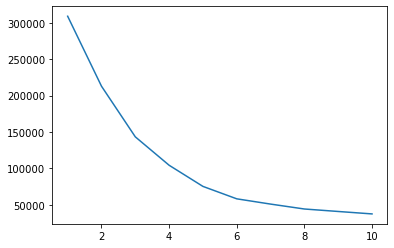

In [698]:
plt.plot(range(1,11), sonuclar)

In [699]:
kmeans = KMeans(n_clusters = 6, init = "k-means++", random_state = 0)
Y_tahmin = kmeans.fit_predict(X)

In [700]:
Y_tahmin

array([5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4,
       5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 1, 4, 1, 0,
       5, 4, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [701]:
X.shape

(200, 4)

In [702]:
data = load_digits().data
pca = PCA(4)

In [703]:
df = pca.fit_transform(X)

In [704]:
df.shape

(200, 4)

In [719]:
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 0)
Y_tahmin = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
Y_tahmin

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

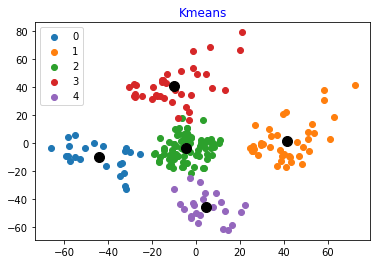

In [707]:
y_pred = np.unique(Y_tahmin)
centroids = kmeans.cluster_centers_
for i in y_pred:
    plt.scatter(df[Y_tahmin == i, 0], df[Y_tahmin == i, 1],  label = i)
   
plt.scatter(centroids[:,0], centroids[:,1], s = 100, color ="k" )
plt.legend()
plt.title("Kmeans", c = "b")
plt.show()

In [708]:
X

array([[  1,  19,  15,  39],
       [  1,  21,  15,  81],
       [  0,  20,  16,   6],
       [  0,  23,  16,  77],
       [  0,  31,  17,  40],
       [  0,  22,  17,  76],
       [  0,  35,  18,   6],
       [  0,  23,  18,  94],
       [  1,  64,  19,   3],
       [  0,  30,  19,  72],
       [  1,  67,  19,  14],
       [  0,  35,  19,  99],
       [  0,  58,  20,  15],
       [  0,  24,  20,  77],
       [  1,  37,  20,  13],
       [  1,  22,  20,  79],
       [  0,  35,  21,  35],
       [  1,  20,  21,  66],
       [  1,  52,  23,  29],
       [  0,  35,  23,  98],
       [  1,  35,  24,  35],
       [  1,  25,  24,  73],
       [  0,  46,  25,   5],
       [  1,  31,  25,  73],
       [  0,  54,  28,  14],
       [  1,  29,  28,  82],
       [  0,  45,  28,  32],
       [  1,  35,  28,  61],
       [  0,  40,  29,  31],
       [  0,  23,  29,  87],
       [  1,  60,  30,   4],
       [  0,  21,  30,  73],
       [  1,  53,  33,   4],
       [  1,  18,  33,  92],
       [  0,  

In [709]:
kmeans.predict([[1,19,15,39]])

array([2])

In [710]:
kmeans.predict([[0,  30,  19,  72]])

array([3])

In [711]:
ac = AgglomerativeClustering(n_clusters = 5, affinity = "euclidean", linkage = "ward")
Y_tahmin1 = ac.fit_predict(X)


In [712]:
Y_tahmin1

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

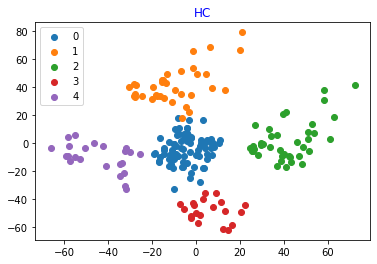

In [713]:
y_pred1 = np.unique(Y_tahmin1)
for i in y_pred1:
    plt.scatter(df[Y_tahmin1 == i, 0], df[Y_tahmin1 == i, 1],  label = i)
   
plt.legend()
plt.title("HC", c = "b")
plt.show()

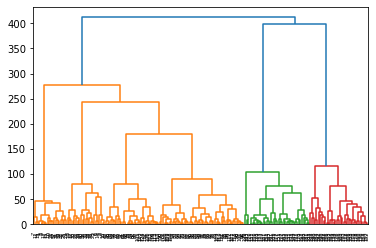

In [718]:
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))